## Loading the corpus

In [143]:
songs=[]
base_file_name="corpus/a_{index}.txt"
for i in range(1,370):
    try:
        song=open(base_file_name.format(index=i),"r",encoding="utf-8")
        lyrics=song.readlines()
        songs.append("".join(lyrics))
    except FileNotFoundError:
        pass

## Data Preprocessing
- most of the data is cleanging while scraping the data itself.
- Punctuations and \u200c must be replaced with white space.
- EOF must be replaced with \s\n\s so that end of line is considered as special word itself

In [144]:
for i in range(len(songs)):
    songs[i]=songs[i].replace("\n"," \n ")
    songs[i]=songs[i].replace("\u200c","")
    songs[i]=songs[i].replace("."," ")
    songs[i]=songs[i].replace("?"," ")
    songs[i]=songs[i].replace(","," ")
    songs[i]=songs[i].replace("!"," ")
    if songs[i][-1]!=" ":
        songs[i]+=" \n "

## Corpus Statistics

In [157]:
words_count=[]
chars_count=[]
unique_words={}

In [158]:
for i in range(len(songs)):
    word_count=len(songs[i].split())
    char_count=sum([len(i) for i in songs[i].split()])
    words_count.append(word_count)
    chars_count.append(char_count)
    for i in songs[i].split():
        if i not in unique_words:
            unique_words[i]=1
        else:
            unique_words[i]+=1
    

In [159]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'number of songs')

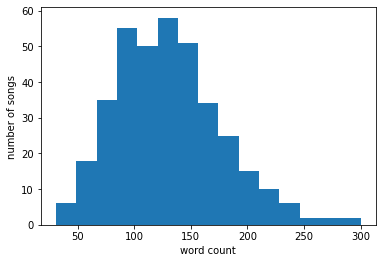

In [160]:
plt.hist(np.array(words_count),bins=15)
plt.xlabel("word count")
plt.ylabel("number of songs")


The average words per song is 193 and there are a lot of songs with word count in the range of 100 to 200

In [161]:
round(sum(words_count)/len(words_count))

130

In [162]:
round(sum(chars_count)/sum(words_count))

6

The average character per word count is 6 characters per word.

In [189]:
word_freq=pd.DataFrame.from_dict(unique_words,orient="index")
word_freq["word"]=word_freq.index
word_freq.index=range(1,len(word_freq.index)+1)
word_freq=word_freq.rename(columns={0:"count"})
word_freq.head()

,count,word
1,310,ఆ
2,13,నవ్వులో
3,1,ఏమున్నదో
4,1,చలించింది
5,497,నా


In [192]:
word_freq.sort_values(by="count",ascending=False)

,count,word
131,743,నీ
143,509,ఈ
5,497,నా
1,310,ఆ
797,269,ఓ
...,...,...
8770,1,మతిమరచి
8771,1,శూలాన
8772,1,మెడవిరిచి
8773,1,చూపె


words like నీ, ఈ, నా, ఆ are the most repetative words. Most of these words are pronouns. We can see that some important words like time, శూలాన, చూపె have a very less frequency of 1. So we can't filter words based on frequency for feeding into the model